In [2]:
#!pip install tensorflow  # Install TensorFlow for keras preprocessing
import keras
from tensorflow.keras.preprocessing.text import Tokenizer # Use tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences # Use tensorflow.keras
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

# Importando dataset
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())
print(df.describe())
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)


In [3]:
# Sentiment count
print("Total : \n", df['sentiment'].value_counts())

Total : 
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [4]:
# Preprocesamiento de las secuencias
review = []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

In [5]:
# Preprocesamiento de las secuencias
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))


In [6]:
# Preprocesamiento de las secuencias
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20, random_state=42)

In [7]:
# Parametros
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
# inicializar la clase tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

# Generar el diccionario de indices de palabras para el entrenamiento de las frases
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generar y hacer pad a las secuencias entrenadas
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

# Generar y hacer pad a las secuencias de prueba
testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [8]:
# Construcción del modelo
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
# Construcción y entrenamiento del modelo
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Imprimir el modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7109 - loss: 0.5285 - val_accuracy: 0.8478 - val_loss: 0.3468
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9101 - loss: 0.2281 - val_accuracy: 0.8320 - val_loss: 0.4021
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9780 - loss: 0.0717 - val_accuracy: 0.8118 - val_loss: 0.6269
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9954 - loss: 0.0193 - val_accuracy: 0.8082 - val_loss: 0.9096
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9986 - loss: 0.0067 - val_accuracy: 0.8059 - val_loss: 1.1520
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9968 - loss: 0.0087 - val_accuracy: 0.8025 - val_loss: 1.1955
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.8005 - val_loss: 1.2462
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9981 - loss: 0.0067 -

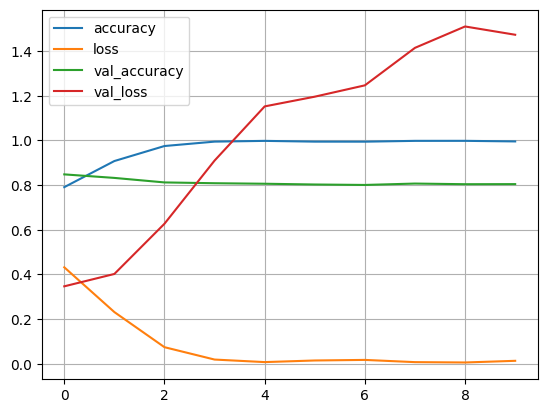

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precisión del modelo: 80.42%
F1-score: 0.8062537106669304
[[3968  993]
 [ 965 4074]]


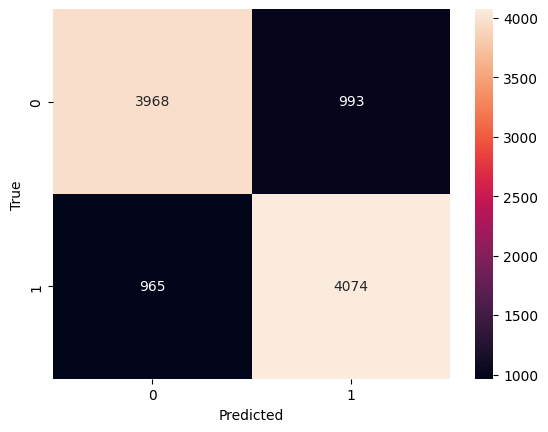

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


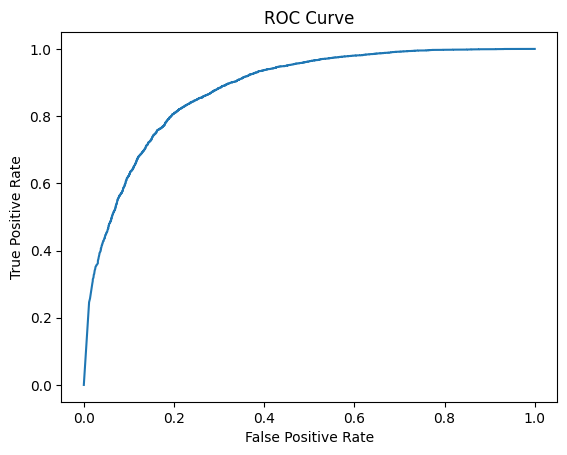

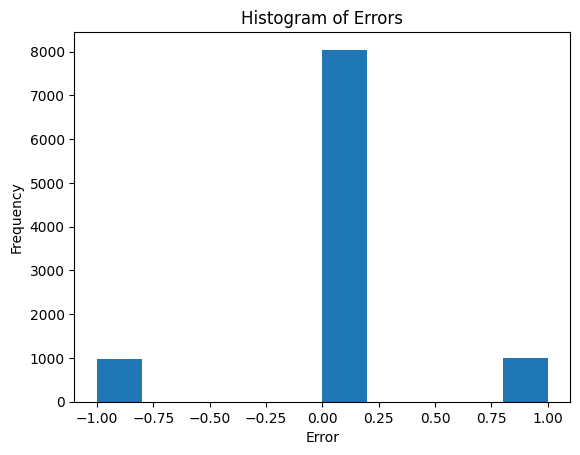

In [10]:
# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs = 10, validation_data = (testing_padded, test_labels))

# Graficar el historial de entremiento
pd.DataFrame(history.history).plot(grid = True)
plt.show()

# Genera predicciones para los datos de prueba
predictions = model.predict(testing_padded)
# Convierte las probabilidades en etiquetas (0 o 1)
predicted_labels = (predictions > 0.5).astype(int)

# Calcula la precisión del modelo
accuracy = np.mean(predicted_labels.flatten() == test_labels)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

f1 = f1_score(test_labels, predicted_labels)
print(f"F1-score: {f1}")

cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

f1 = f1_score(test_labels, predicted_labels)
print(f"F1-score: {f1}")

y_pred_proba = model.predict(testing_padded)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

errors = predicted_labels.flatten() - test_labels
plt.hist(errors, bins=10)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()


Preguntas:

1. ¿Qué hace el código en general?
Este código realiza un análisis de sentimientos (positivos y negativos)sobre un conjunto de datos de reseñas de películas (IMDB Dataset.csv que casualmente había usado para el ejercicio anterior). El objetivo es construir y entrenar un modelo de aprendizaje automático que pueda predecir si una reseña es positiva o negativa.
2. ¿Cuál es el propósito de cada parte del código?

1. Importación de librerías: Se importan las librerías necesarias para el procesamiento de datos, el aprendizaje automático y la visualización.
2. Carga y exploración de datos: Se carga el conjunto de datos IMDB Dataset.csv y se exploran sus características (head, describe, info).
3. Conteo de sentimientos: Se cuenta la cantidad de reseñas positivas y negativas para tener una idea de la distribución de los datos.
4. Preprocesamiento de texto: Se convierten las reseñas en una lista y se codifican las etiquetas de sentimiento (positivo como 1, negativo como 0).
División de datos: Se divide el conjunto de datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
Tokenización y padding: Se tokenizan las reseñas (convirtiendo palabras en números) y se aplica padding para que todas las secuencias tengan la misma longitud.
Construcción del modelo: Se define un modelo de red neuronal con capas de embedding, flatten, dense y una capa de salida sigmoid para la clasificación binaria.
Compilación del modelo: Se compila el modelo con la función de pérdida 'binary_crossentropy', el optimizador 'adam' y la métrica de precisión.
Entrenamiento del modelo: Se entrena el modelo con los datos de entrenamiento y se valida con los datos de prueba durante 10 épocas.
Visualización del entrenamiento: Se grafica el historial de entrenamiento para observar la evolución de la pérdida y la precisión a lo largo de las épocas.
3. ¿Por qué se utilizan los parámetros específicos en cada función (por ejemplo,num_words, embedding_dim, input_length, loss, optimizer, etc.)?

Los parámetros específicos utilizados en cada función desempeñan un papel prioritario en el rendimiento y la configuración del modelo de aprendizaje automático.

Parámetros de Tokenización y Padding:

- num_words: Define el tamaño del vocabulario, es decir, el número máximo de palabras únicas a considerar. Palabras menos frecuentes serán ignoradas.
- oov_tok: Token especial para representar palabras fuera del vocabulario (Out-Of-Vocabulary).
- max_length: Longitud máxima de las secuencias de entrada al modelo. Secuencias más largas serán truncadas y más cortas serán rellenadas (padding).
- trunc_type: Indica cómo truncar secuencias más largas que max_length ('pre' o 'post').
- padding_type: Indica cómo rellenar secuencias más cortas que max_length ('pre' o 'post').

Parámetros de la Capa de Embedding:

- vocab_size: Tamaño del vocabulario, igual al num_words del tokenizador.
- embedding_dim: Dimensionalidad del espacio de embedding, es decir, la longitud de los vectores que representan cada palabra.

Parámetros de las Capas Dense:

- 64: Número de neuronas en la capa densa oculta.
- activation='relu': Función de activación ReLU (Rectified Linear Unit) para introducir no linealidad en el modelo.

Parámetros de la Capa de Salida:

- 1: Una única neurona de salida para la clasificación binaria (positivo o negativo).
- activation='sigmoid': Función de activación sigmoide para obtener una probabilidad de salida entre 0 y 1.

Parámetros de Compilación del Modelo:

- loss='binary_crossentropy': Función de pérdida adecuada para problemas de clasificación binaria.
- optimizer='adam': Algoritmo de optimización Adam para ajustar los pesos del modelo durante el entrenamiento.
- metrics=['accuracy']: Métrica para evaluar el rendimiento del modelo, en este caso, la precisión.

Parámetros de Entrenamiento:

- epochs=10: Número de veces que el modelo itera sobre todo el conjunto de datos de entrenamiento.

La selección de todos estos parámetros depende de la naturaleza de lo que se quiera conseguir, por ejemplo, el tamaño del conjunto de datos y la arquitectura del modelo. Experimentar con diferentes valores puede mejorar el rendimiento del modelo.
4. ¿Cuál es la diferencia entre train_sentences y test_sentences?

La diferencia radica en su propósito para el proceso de entrenamiento y evaluación de un modelo de aprendizaje automático.

- train_sentences: Contiene las reseñas que se utilizan para entrenar el modelo. El modelo aprende a identificar patrones y relaciones entre las palabras y las etiquetas de sentimiento (positivo o negativo) a partir de estas reseñas.

- test_sentences: Contiene reseñas que el modelo no ha visto durante el entrenamiento. Se utiliza para evaluar el rendimiento del modelo en datos nuevos y desconocidos. Al comparar las predicciones del modelo en test_sentences con las etiquetas reales, se puede medir la capacidad del modelo para generalizar a nuevos datos.

La división del conjunto de datos en conjuntos de entrenamiento y prueba es prioritario para evitar el llamado sobreajuste que ocurre cuando el modelo aprende los datos de entrenamiento demasiado bien y no puede generalizar a nuevos datos.

5. ¿Qué significan vocab_size, max_length, embedding_dim y oov_tok?

Ya se habían visto en el tercer punto pero no importa, estos parámetros son importantes en el procesamiento del lenguaje natural y la construcción de modelos de aprendizaje automático para texto.

- vocab_size: Representa el tamaño del vocabulario, es decir, el número máximo de palabras únicas que el modelo considerará. Palabras que aparecen con menos frecuencia que el límite establecido serán ignoradas o tratadas como tokens fuera del vocabulario.

- max_length: Define la longitud máxima de las secuencias de texto que se introducirán en el modelo. Las secuencias más largas serán truncadas y las más cortas serán rellenadas (padding) para asegurar que todas las secuencias tengan la misma longitud.

- embedding_dim: Es la dimensionalidad del espacio de embedding, es decir, la longitud de los vectores que representarán cada palabra. Un valor mayor permite capturar más matices del significado de las palabras, pero también puede aumentar la complejidad del modelo.

- oov_tok: Es un token especial que se utiliza para representar palabras que no están presentes en el vocabulario (Out-Of-Vocabulary). Esto permite al modelo manejar palabras desconocidas sin generar errores.

6. ¿Por qué se utilizan las capas Embedding, Flatten, Dense y sigmoid en el modelo?

Cada capa en el modelo cumple una función específica en el procesamiento de las reseñas y la generación de una predicción de sentimiento:

- Capa Embedding:  Transforma las palabras (representadas como índices) en vectores densos de baja dimensionalidad (embeddings). Permite al modelo capturar relaciones semánticas entre palabras, ya que palabras con significados similares tendrán embeddings cercanos en el espacio vectorial.
- Capa Flatten: Convierte la salida multidimensional de la capa Embedding en un vector unidimensional. Prepara los datos para ser procesados por las capas Dense subsiguientes, que esperan una entrada unidimensional.
- Capas Dense: Son capas completamente conectadas donde cada neurona está conectada a todas las neuronas de la capa anterior.
Permiten al modelo aprender patrones complejos en los datos a través de una combinación lineal de las entradas y la aplicación de una función de activación.  La primera capa Dense (con 64 neuronas y activación ReLU) introduce no linealidad en el modelo, permitiendo aprender relaciones no lineales entre las características.
- Capa Sigmoid: Es la capa de salida con una única neurona y función de activación sigmoide. Produce una probabilidad entre 0 y 1, que representa la confianza del modelo en que la reseña sea positiva. Un valor cercano a 1 indica un sentimiento positivo, mientras que un valor cercano a 0 indica un sentimiento negativo.

En conjunto, estas capas forman una red neuronal capaz de aprender a partir de las reseñas de películas y predecir su sentimiento con cierta precisión.

7. ¿Qué representan las métricas de pérdida y precisión en el modelo?

Las métricas de pérdida y precisión son muy importantes cuando se quiere evaluar el rendimiento de un modelo de aprendizaje automático durante el entrenamiento y la validación.

- Pérdida (Loss): Mide el error del modelo al realizar predicciones. En este caso, se utiliza la "binary crossentropy", una función de pérdida común para problemas de clasificación binaria. Un valor de pérdida más bajo indica que el modelo está haciendo mejores predicciones, acercándose a las etiquetas reales.

- Precisión (Accuracy): Mide el porcentaje de predicciones correctas realizadas por el modelo. Se calcula como el número de predicciones correctas dividido por el número total de predicciones. Una precisión más alta indica un mejor rendimiento del modelo, pero debe interpretarse en conjunto con otras métricas y considerando el contexto del problema.
Durante el entrenamiento, el modelo busca minimizar la pérdida y maximizar la precisión ajustando sus pesos. Estas métricas permiten monitorear el progreso del entrenamiento y evaluar la capacidad del modelo para generalizar a nuevos datos.

8. ¿Qué pasa durante el entrenamiento del modelo?

Durante el entrenamiento del modelo, ocurren varios procesos clave para que el modelo aprenda a realizar predicciones precisas sobre el sentimiento de las reseñas:

1- Propagación hacia adelante (Forward Propagation): El modelo recibe un lote de datos de entrenamiento (reseñas tokenizadas y rellenadas). Los datos se propagan a través de las capas del modelo (Embedding, Flatten, Dense), realizando cálculos en cada capa. Finalmente, la capa de salida produce una predicción para cada reseña (probabilidad de ser positiva).
2- Cálculo de la pérdida: Se compara la predicción del modelo con la etiqueta real (sentimiento positivo o negativo) utilizando la función de pérdida (binary crossentropy).  La función de pérdida cuantifica el error del modelo en la predicción.
3- Retropropagación (Backpropagation): Se calcula el gradiente de la pérdida con respecto a los pesos del modelo. El gradiente indica la dirección y magnitud en la que deben ajustarse los pesos para reducir el error.
4- Optimización: El optimizador (en este caso, Adam) utiliza el gradiente para actualizar los pesos del modelo. El objetivo es encontrar los pesos que minimicen la pérdida y mejoren la precisión del modelo.
5- Repetición: Los pasos 1 a 4 se repiten para cada lote de datos de entrenamiento y para cada época (iteración completa sobre el conjunto de datos de entrenamiento).  A medida que el modelo se entrena, ajusta sus pesos para mejorar su capacidad de predecir el sentimiento de las reseñas.

Durante el entrenamiento, se monitorean las métricas de pérdida y precisión para evaluar el progreso del modelo y detectar posibles problemas como el sobreajuste.

9. ¿Qué significan las épocas y cómo afectan al proceso de entrenamiento?

Las épocas son un hiperparámetro en el entrenamiento de modelos de aprendizaje automático que indican el número de veces que el algoritmo de aprendizaje iterará sobre todo el conjunto de datos de entrenamiento.

En cada época, el modelo procesa todos los ejemplos de entrenamiento, ajusta sus pesos en función de los errores calculados y mejora su capacidad para predecir.

Si se usan pocas épocas el modelo puede no tener suficiente tiempo para aprender patrones complejos en los datos, lo que puede llevar a un rendimiento deficiente (underfitting).

Si se usan muchas épocas el modelo puede sobreajustarse (overfitting) a los datos de entrenamiento, aprendiendo incluso el ruido y las peculiaridades de los datos de entrenamiento, lo que puede llevar a una mala generalización a datos nuevos.

Encontrar el número óptimo de épocas es un proceso prueba y error monitoreando las métricas de rendimiento (pérdida y precisión) en un conjunto de validación independiente durante el entrenamiento para identificar el punto en el que el modelo comienza a sobreajustarse y detener el entrenamiento en ese momento.

10. ¿Por qué es importante la validación del modelo utilizando los datos de prueba?

La validación del modelo utilizando datos de prueba es crucial por varias razones:

1- Evaluación del rendimiento real: Los datos de prueba son datos que el modelo nunca ha visto durante el entrenamiento.  Al evaluar el modelo en datos de prueba, se obtiene una estimación más realista de su capacidad para generalizar a nuevos datos y situaciones. Esto evita una evaluación sesgada que podría ocurrir si se utilizaran los mismos datos para entrenar y evaluar el modelo.
2- Prevención del sobreajuste (overfitting): El sobreajuste ocurre cuando el modelo aprende los datos de entrenamiento demasiado bien, incluyendo el ruido y las peculiaridades específicas de esos datos. Un modelo sobreajustado tendrá un buen rendimiento en los datos de entrenamiento, pero un rendimiento deficiente en datos nuevos. La validación con datos de prueba ayuda a detectar el sobreajuste y a elegir un modelo que generalice mejor.
3- Comparación de modelos: Si se están entrenando varios modelos con diferentes arquitecturas o hiperparámetros, la validación con datos de prueba permite comparar su rendimiento de manera objetiva. Esto ayuda a seleccionar el modelo que mejor se adapte al problema y que tenga la mayor capacidad de generalización.

En resumen, la validación con datos de prueba es esencial para obtener una evaluación precisa del rendimiento del modelo, prevenir el sobreajuste y tomar decisiones informadas sobre la selección y ajuste del modelo.

11. ¿Cuál es el objetivo final del código?

El objetivo final de este código es construir y entrenar un modelo de aprendizaje automático capaz de predecir el sentimiento (positivo o negativo) de reseñas de películas.



Ejercicios:

1. Modifica los parámetros del modelo (como el tamaño del vocabulario, la longitud máxima, la dimensión de incrustación, etc.) y observa cómo afecta al rendimiento del modelo.
2. Experimenta con diferentes arquitecturas de modelos (agregando o eliminando capas, cambiando las funciones de activación, etc.) y observa cómo afecta al rendimiento.
3. Intenta utilizar un algoritmo de optimización diferente y observa cómo afecta al rendimiento del modelo.
4. Divide los datos en diferentes proporciones para entrenamiento y prueba y observa cómo afecta al rendimiento del modelo.

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.7122 - loss: 0.5173 - val_accuracy: 0.8495 - val_loss: 0.3399
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9468 - loss: 0.1487 - val_accuracy: 0.8275 - val_loss: 0.4505
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9936 - loss: 0.0237 - val_accuracy: 0.8246 - val_loss: 0.6699
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.8330 - val_loss: 0.8023
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 1.0000 - loss: 4.8896e-04 - val_accuracy: 0.8292 - val_loss: 0.8861
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 1.0000 - loss: 8.7045e-05 - val_accuracy: 0.8324 - val_loss: 0.9287
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 1.0000 - loss: 2.9624e-05 - val_accuracy: 0.8323 - val_loss: 0.9677
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 1.0000 

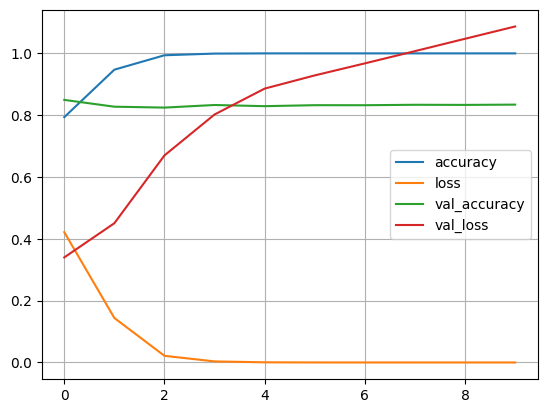

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precisión del modelo: 83.42%
[[4092  869]
 [ 789 4250]]


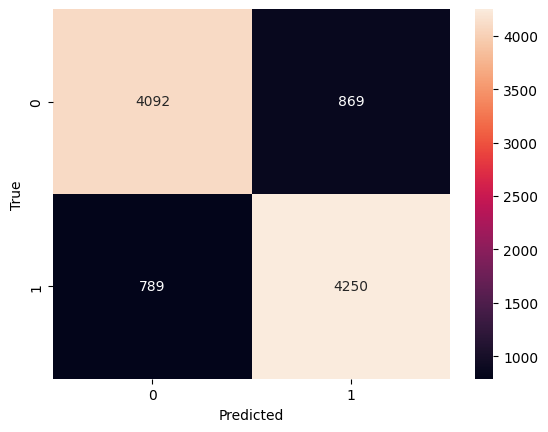

F1-score: 0.836778893482969
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


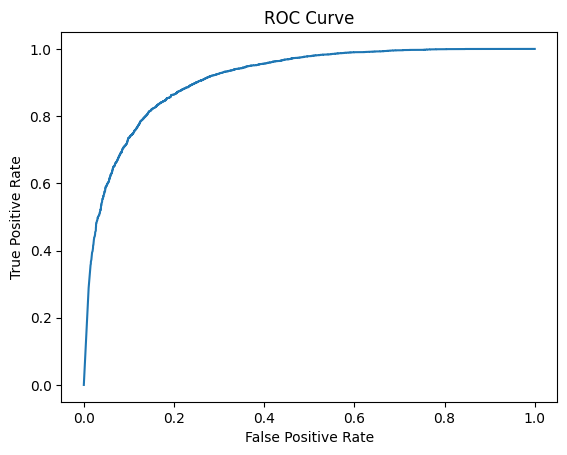

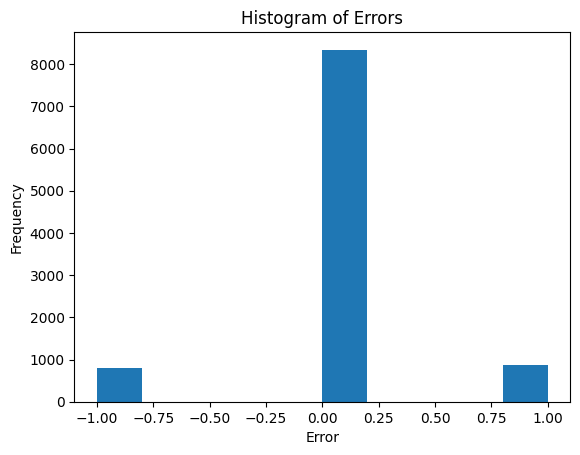

In [11]:
# Parametros
vocab_size = 100000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
# inicializar la clase tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

# Generar el diccionario de indices de palabras para el entrenamiento de las frases
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generar y hacer pad a las secuencias entrenadas
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

# Generar y hacer pad a las secuencias de prueba
testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)
# Construcción del modelo
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Construcción y entrenamiento del modelo
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs = 10, validation_data = (testing_padded, test_labels))

# Graficar el historial de entremiento
pd.DataFrame(history.history).plot(grid = True)
plt.show()

# Genera predicciones para los datos de prueba
predictions = model.predict(testing_padded)
# Convierte las probabilidades en etiquetas (0 o 1)
predicted_labels = (predictions > 0.5).astype(int)

# Calcula la precisión del modelo
accuracy = np.mean(predicted_labels.flatten() == test_labels)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

f1 = f1_score(test_labels, predicted_labels)
print(f"F1-score: {f1}")

y_pred_proba = model.predict(testing_padded)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

errors = predicted_labels.flatten() - test_labels
plt.hist(errors, bins=10)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.show()

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7012 - loss: 0.5330 - val_accuracy: 0.8392 - val_loss: 0.3574
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9162 - loss: 0.2128 - val_accuracy: 0.8229 - val_loss: 0.4158
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9792 - loss: 0.0622 - val_accuracy: 0.8116 - val_loss: 0.7069
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9918 - loss: 0.0252 - val_accuracy: 0.8034 - val_loss: 1.0204
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9938 - loss: 0.0175 - val_accuracy: 0.8044 - val_loss: 1.1617
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.8100 - val_loss: 1.0923
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.8133 - val_loss: 1.1470
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9966 - loss: 0.00

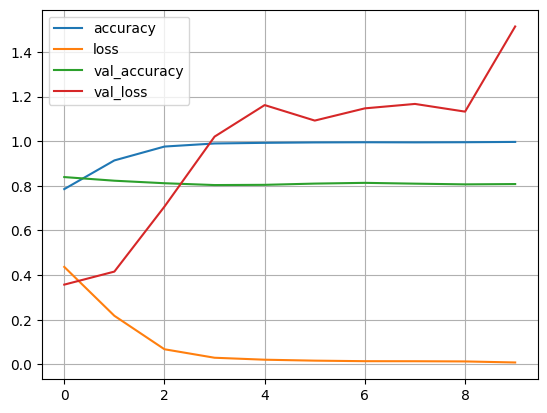

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precisión del modelo: 80.79%
[[3959 1002]
 [ 919 4120]]


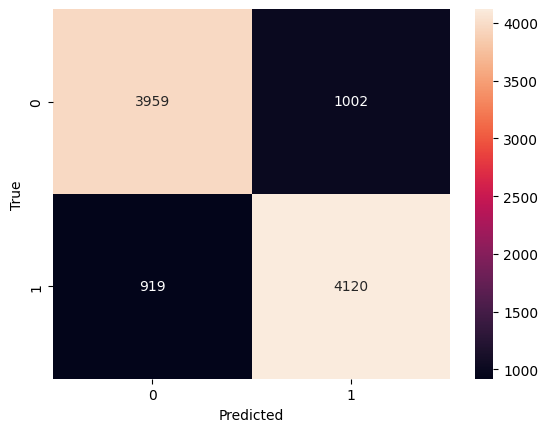

In [ ]:
# Parametros
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
# inicializar la clase tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

# Generar el diccionario de indices de palabras para el entrenamiento de las frases
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generar y hacer pad a las secuencias entrenadas
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

# Generar y hacer pad a las secuencias de prueba
testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)
# Construcción del modelo
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# Construcción y entrenamiento del modelo
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Entrenamiento del modelo
history = model.fit(padded, train_labels, epochs = 10, validation_data = (testing_padded, test_labels))

# Graficar el historial de entremiento
pd.DataFrame(history.history).plot(grid = True)
plt.show()

# Genera predicciones para los datos de prueba
predictions = model.predict(testing_padded)
# Convierte las probabilidades en etiquetas (0 o 1)
predicted_labels = (predictions > 0.5).astype(int)

# Calcula la precisión del modelo
accuracy = np.mean(predicted_labels.flatten() == test_labels)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()